Text(0.5, 1.0, 'Petal')

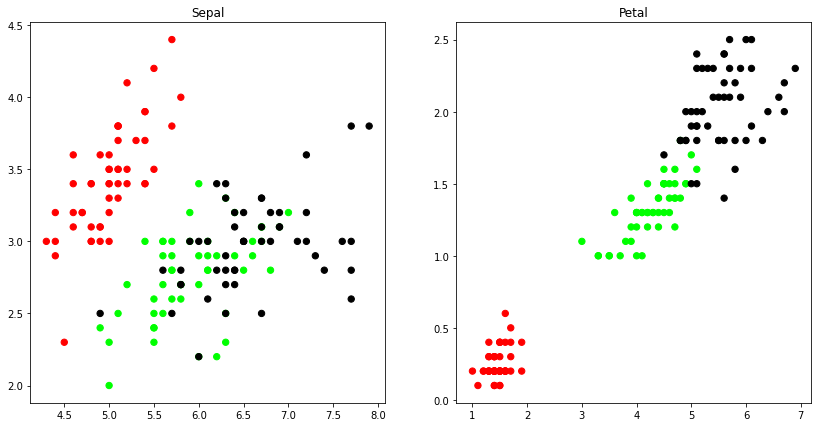

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm 
import pandas as pd 
import numpy as np 
%matplotlib inline

# import some data to play with 
iris = datasets.load_iris() 
#print("\n IRIS DATA :",iris.data); 
#print("\n IRIS FEATURES :\n",iris.feature_names) 
#print("\n IRIS TARGET :\n",iris.target) 
#print("\n IRIS TARGET NAMES:\n",iris.target_names) 
# Store the inputs as a Pandas Dataframe and set the column names 
X = pd.DataFrame(iris.data) 

#print(X) 
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.columns) 
#print("X:",X) 
#print("Y:",y) 
y = pd.DataFrame(iris.target) 
y.columns = ['Targets'] 

# Set the size of the plot 
plt.figure(figsize=(14,7)) 

# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot Sepal 
plt.subplot(1, 2, 1) 
plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[y.Targets], s=40) 
plt.title('Sepal') 

plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Petal')

In [ ]:
# K Means Cluster 
model = KMeans(n_clusters=3) 
model.fit(X) 
# This is what KMeans thought 
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Text(0.5,1,'K Mean Classification')

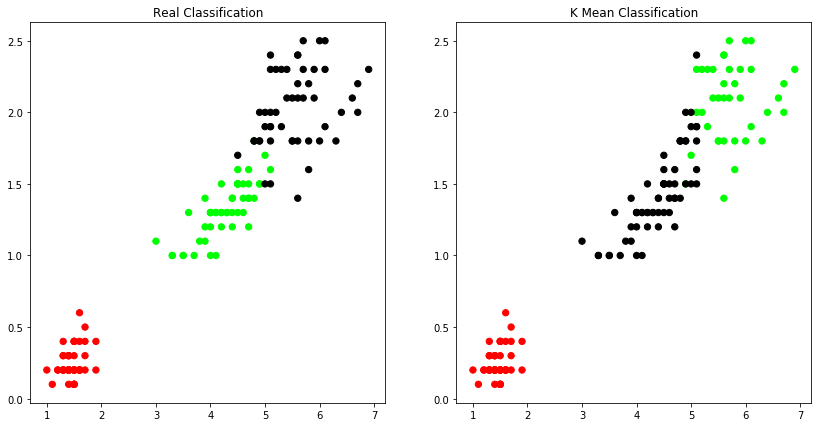

In [ ]:
# View the results 
# Set the size of the plot 
plt.figure(figsize=(14,7)) 
# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot the Original Classifications 
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Classification') 
# Plot the Models Classifications 
plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K Mean Classification')

In [ ]:
# The fix, we convert all the 1s to 0s and 0s to 1s. 
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64) 
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Text(0.5,1,'K Mean Classification')

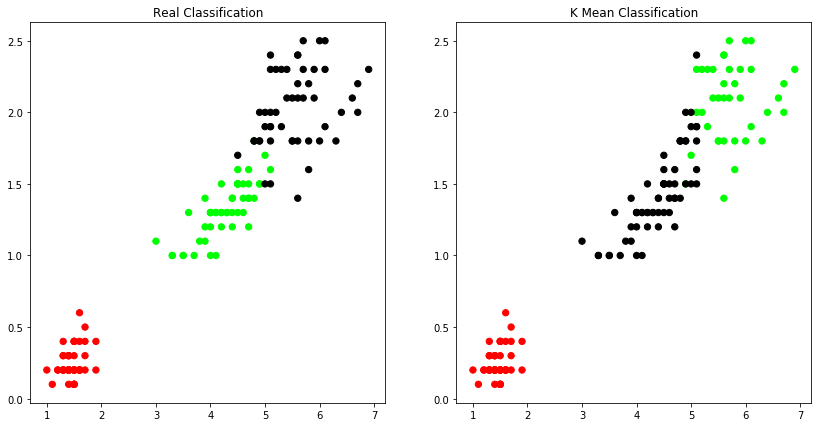

In [ ]:
# View the results 
# Set the size of the plot 
plt.figure(figsize=(14,7))
# Create a colormap 
colormap = np.array(['red', 'lime', 'black']) 
# Plot Orginal
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Classification') 
# Plot Predicted with corrected values 
plt.subplot(1, 2, 2) 
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40) 
plt.title('K Mean Classification')

In [ ]:
sm.accuracy_score(y, model.labels_)

0.44

In [ ]:
# Confusion Matrix 
sm.confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]], dtype=int64)

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler() 
scaler.fit(X) 
xsa = scaler.transform(X) 
xs = pd.DataFrame(xsa, columns = X.columns) 
xs.sample(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
52,1.280340,0.098217,0.649083,0.395774
131,2.492019,1.709595,1.501645,1.053935
88,-0.294842,-0.131979,0.194384,0.132510
121,-0.294842,-0.592373,0.649083,1.053935
97,0.432165,-0.362176,0.308059,0.132510
115,0.674501,0.328414,0.876433,1.448832
85,0.189830,0.788808,0.421734,0.527406
45,-1.264185,-0.131979,-1.340227,-1.183812
6,-1.506521,0.788808,-1.340227,-1.183812
17,-0.900681,1.019004,-1.340227,-1.183812


In [ ]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)

GaussianMixture(n_components=3)

In [ ]:
y_cluster_gmm = gmm.predict(xs) 
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'GMM Classification')

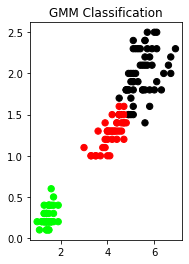

In [ ]:
plt.subplot(1, 2, 1) 
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40) 
plt.title('GMM Classification')

In [ ]:
sm.accuracy_score(y, y_cluster_gmm)

0.3333333333333333

In [ ]:
# Confusion Matrix 
sm.confusion_matrix(y, y_cluster_gmm)

array([[ 0, 50,  0],
       [45,  0,  5],
       [ 0,  0, 50]])

In [ ]:
# so the GMM clustering matched the true labels more closely than the Kmeans, # as expected from the plots.